In [77]:
import numpy as np
import pandas as pd


import matplotlib as plt

In [78]:
tr=pd.read_csv('train_fNxu4vz.csv')
te=pd.read_csv('test_fjtUOL8.csv')

In [79]:
tr.shape

(164309, 14)

In [80]:
tr.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


# Changing data type of the column wherever necessary

In [81]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [82]:
tr['Loan_Amount_Requested']=tr['Loan_Amount_Requested'].str.replace(',','').astype(float)

In [83]:
te['Loan_Amount_Requested']=te['Loan_Amount_Requested'].str.replace(',','').astype(float)

In [84]:
# 

In [85]:
tr.Home_Owner.value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [86]:
tr['Home_Owner']=tr.Home_Owner.replace("None",'Other')

In [87]:
te.Home_Owner.value_counts()

Mortgage    46925
Rent        37511
Own          8354
Other          30
None           10
Name: Home_Owner, dtype: int64

In [88]:
te['Home_Owner']=tr.Home_Owner.replace("None",'Other')

In [89]:
tr.Income_Verified.value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [90]:
tr['Income_Verified']=tr.Income_Verified.replace(['VERIFIED - income','VERIFIED - income source','not verified'],
                                                ['VERIFIED','VERIFIED','NOT VERIFIED'])

In [91]:
te.Income_Verified.value_counts()

VERIFIED - income           39655
VERIFIED - income source    35238
not verified                34648
Name: Income_Verified, dtype: int64

In [92]:
te['Income_Verified']=te.Income_Verified.replace(['VERIFIED - income','VERIFIED - income source','not verified'],
                                                ['VERIFIED','VERIFIED','NOT VERIFIED'])

In [93]:
tr.Purpose_Of_Loan.value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [94]:
tr.Gender.value_counts()

Male      117176
Female     47133
Name: Gender, dtype: int64

# Missing value Imputation for Categorical Features

### Imputation for Length_Employed

In [95]:
imp=tr

In [96]:
imp1=te

In [97]:
list(imp1.Length_Employed.unique())

['10+ years',
 '< 1 year',
 '6 years',
 '8 years',
 '1 year',
 '3 years',
 '2 years',
 nan,
 '4 years',
 '7 years',
 '5 years',
 '9 years']

In [98]:
imp1['Length_Employed']=imp1.Length_Employed.replace([
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'],
    [0,1,2,3,4,5,6,7,8,9,10])

In [99]:
imp['Length_Employed']=imp.Length_Employed.replace([
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'],
    [0,1,2,3,4,5,6,7,8,9,10])

In [210]:
imp[['Length_Employed','Annual_Income']].corr()

,Length_Employed,Annual_Income
Length_Employed,1.000000,0.069505
Annual_Income,0.069505,1.000000


In [201]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  float64
 2   Length_Employed          156938 non-null  float64
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [101]:
list(imp.columns)

['Loan_ID',
 'Loan_Amount_Requested',
 'Length_Employed',
 'Home_Owner',
 'Annual_Income',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Gender',
 'Interest_Rate']

In [102]:
td=imp[['Loan_Amount_Requested',
 'Length_Employed',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Gender']]

In [103]:
td1=imp1[['Loan_Amount_Requested',
 'Length_Employed',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Gender']]

In [104]:
test=td[td.Length_Employed.isnull()]

In [105]:
test1=td1[td1.Length_Employed.isnull()]

In [106]:
train=td[td.Length_Employed.notna()]

In [107]:
train1=td1[td1.Length_Employed.notna()]

In [108]:
test.shape

(7371, 9)

In [109]:
train.shape

(156938, 9)

In [110]:
test1.shape

(4936, 9)

In [111]:
train1.shape

(104605, 9)

In [112]:
X_train=train[['Loan_Amount_Requested',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Gender']]

In [113]:
X1_train=train1[['Loan_Amount_Requested',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Gender']]

In [114]:
y_train=train['Length_Employed']

In [115]:
y1_train=train1['Length_Employed']

In [116]:
y_train

0          0.0
1          4.0
2          7.0
3          0.0
4          8.0
          ... 
164304    10.0
164305     8.0
164306    10.0
164307     4.0
164308    10.0
Name: Length_Employed, Length: 156938, dtype: float64

In [117]:
X_test=test[['Loan_Amount_Requested',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Gender']]

In [118]:
X1_test=test1[['Loan_Amount_Requested',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Gender']]

In [119]:
X_test

,Loan_Amount_Requested,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
23,9050.0,VERIFIED,debt_consolidation,30.43,0,8,26,Male
43,1500.0,NOT VERIFIED,medical,24.40,2,5,17,Male
67,9750.0,VERIFIED,credit_card,16.06,1,3,6,Male
69,4500.0,VERIFIED,credit_card,10.34,0,6,10,Male
88,7000.0,VERIFIED,major_purchase,30.11,2,8,20,Male
...,...,...,...,...,...,...,...,...
164268,19750.0,VERIFIED,credit_card,17.40,0,8,12,Female
164272,10000.0,VERIFIED,debt_consolidation,33.42,1,14,16,Male
164289,8000.0,VERIFIED,debt_consolidation,21.08,3,6,19,Male
164294,13700.0,VERIFIED,debt_consolidation,32.92,0,15,38,Male


In [120]:
X1_test

,Loan_Amount_Requested,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender
12,25000.0,VERIFIED,credit_card,20.25,0,6,21,Female
56,30000.0,VERIFIED,credit_card,20.05,0,8,26,Male
105,4000.0,VERIFIED,credit_card,14.20,1,20,38,Male
110,18900.0,VERIFIED,debt_consolidation,15.97,1,10,24,Female
198,24000.0,VERIFIED,home_improvement,10.98,1,5,13,Male
...,...,...,...,...,...,...,...,...
109426,10000.0,VERIFIED,credit_card,24.62,1,12,19,Male
109433,10000.0,VERIFIED,home_improvement,33.92,0,16,27,Female
109502,3000.0,NOT VERIFIED,debt_consolidation,11.98,1,10,33,Male
109510,15000.0,VERIFIED,debt_consolidation,24.68,0,8,31,Male


In [121]:
X_train_f=pd.concat([X_train, X1_train], axis=0)

In [122]:
y_train_f=pd.concat([y_train, y1_train], axis=0)

In [123]:
X_train_f.shape

(261543, 8)

In [124]:
y_train_f=list(y_train_f)

# Creating dummy veriables

In [125]:
X_train_f=pd.get_dummies(X_train_f)

In [126]:
X_test=pd.get_dummies(X_test)

In [127]:
X1_test=pd.get_dummies(X1_test)

In [128]:
X_train_f.shape

(261543, 23)

In [129]:
X_test.shape

(7371, 23)

In [130]:
X1_test.shape

(4936, 23)

In [131]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN learner
clf = KNeighborsClassifier(3, weights='distance')
trained_model = clf.fit(X[:,1:], X[:,0])

# Predict missing values' class
imputed_values = trained_model.predict(X_with_nan[:,1:])

# Join column of predicted class with their other features
X_with_imputed = np.hstack((imputed_values.reshape(-1,1), X_with_nan[:,1:]))

# Join two feature matrices
np.vstack((X_with_imputed, X))

NameError: name 'X' is not defined

In [132]:
from sklearn.neighbors import KNeighborsClassifier
# Train KNN learner
clf = KNeighborsClassifier(3, weights='distance')

In [133]:
trained_model = clf.fit(X_train_f,y_train_f)

In [134]:
# Predict missing values' class
imputed_values = trained_model.predict(X_test)

In [135]:
pred=list(imputed_values)

In [136]:
pred[:10]

[7.0, 7.0, 4.0, 10.0, 7.0, 7.0, 6.0, 5.0, 8.0, 2.0]

In [137]:
# Predict missing values' class
imputed_values1 = trained_model.predict(X1_test)

In [138]:
pred1=list(imputed_values1)


[10.0, 1.0, 3.0, 1.0, 9.0, 9.0, 10.0, 8.0, 9.0, 10.0]

# Reforming data frame

In [161]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  float64
 2   Length_Employed          156938 non-null  float64
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [194]:
i=tr.loc[tr.Length_Employed.isnull(),'Loan_ID'].reset_index()

In [178]:
p=pd.Series(pred)

In [183]:
len(p)

7371

In [184]:
len(i)

7371

In [191]:
p

0        7.0
1        7.0
2        4.0
3       10.0
4        7.0
        ... 
7366    10.0
7367     7.0
7368    10.0
7369     7.0
7370    10.0
Length: 7371, dtype: float64

In [195]:
i

,index,Loan_ID
0,23,10000024
1,43,10000044
2,67,10000068
3,69,10000070
4,88,10000089
...,...,...
7366,164268,10164269
7367,164272,10164273
7368,164289,10164290
7369,164294,10164295


In [196]:
z=pd.concat([i, p], axis=1)

In [197]:
z.isnull().sum()

index      0
Loan_ID    0
0          0
dtype: int64

In [198]:
z.head()

,index,Loan_ID,0
0,23,10000024,7.0
1,43,10000044,7.0
2,67,10000068,4.0
3,69,10000070,10.0
4,88,10000089,7.0


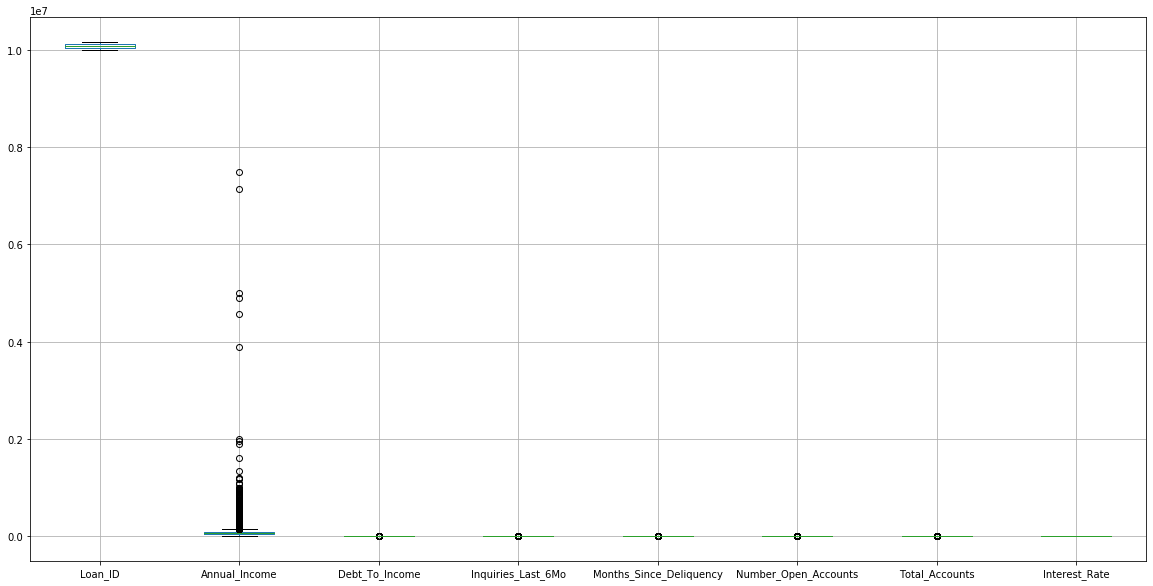

In [22]:
tr.boxplot(figsize=(20,10))

In [23]:
tr.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [24]:
tr.Home_Owner.value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [26]:
tr.corr(method ='pearson')

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
Loan_ID,1.000000,0.008326,-0.001320,0.002593,0.002111,0.004626,0.005331,0.001290
Annual_Income,0.008326,1.000000,-0.173589,0.060011,-0.057804,0.145822,0.203237,-0.052783
Debt_To_Income,-0.001320,-0.173589,1.000000,-0.005142,0.006394,0.302442,0.229871,0.152472
Inquiries_Last_6Mo,0.002593,0.060011,-0.005142,1.000000,0.011971,0.100930,0.131467,0.188987
Months_Since_Deliquency,0.002111,-0.057804,0.006394,0.011971,1.000000,-0.049683,-0.062261,-0.042108
Number_Open_Accounts,0.004626,0.145822,0.302442,0.100930,-0.049683,1.000000,0.682137,0.002847
Total_Accounts,0.005331,0.203237,0.229871,0.131467,-0.062261,0.682137,1.000000,-0.040690
Interest_Rate,0.001290,-0.052783,0.152472,0.188987,-0.042108,0.002847,-0.040690,1.000000


In [29]:
list(tr.columns)

['Loan_ID',
 'Loan_Amount_Requested',
 'Length_Employed',
 'Home_Owner',
 'Annual_Income',
 'Income_Verified',
 'Purpose_Of_Loan',
 'Debt_To_Income',
 'Inquiries_Last_6Mo',
 'Months_Since_Deliquency',
 'Number_Open_Accounts',
 'Total_Accounts',
 'Gender',
 'Interest_Rate']

In [30]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [ ]:
tr

In [31]:
tr.Length_Employed.value_counts()

10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

In [32]:
tr.Home_Owner.value_counts()

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

In [33]:
tr.Income_Verified.value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [34]:
tr.Purpose_Of_Loan.value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [35]:
tr.Inquiries_Last_6Mo.value_counts()

0    85665
1    46071
2    20297
3     8863
4     2278
5      772
6      335
7       20
8        8
Name: Inquiries_Last_6Mo, dtype: int64

In [38]:
tr.Gender.value_counts()

Male      117176
Female     47133
Name: Gender, dtype: int64

In [39]:
tr.Interest_Rate.value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

In [40]:
tr.head(3)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3


In [41]:
tr.Months_Since_Deliquency.describe()

count    75930.000000
mean        34.229356
std         21.761180
min          0.000000
25%         16.000000
50%         31.000000
75%         50.000000
max        180.000000
Name: Months_Since_Deliquency, dtype: float64

In [ ]:
plt.boxplot(tr.Months_Since_Deliquency)

In [43]:
tr.Months_Since_Deliquency.isnull().sum()

88379

In [45]:
tr.Months_Since_Deliquency.describe()

count    75930.000000
mean        34.229356
std         21.761180
min          0.000000
25%         16.000000
50%         31.000000
75%         50.000000
max        180.000000
Name: Months_Since_Deliquency, dtype: float64